<a href="https://colab.research.google.com/github/gmehra123/PORTFOLIO/blob/main/Testing_notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural networks can replicate any function part 2 !!

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch

In [70]:
X = torch.rand(size=(10000,2))
# Creating complex non linear dependent variable
y = torch.exp(X[:,0]) + X[:,1]**2+torch.sin(X[:,0])

In [71]:
y=y.unsqueeze(dim=1)

In [72]:
y.shape

torch.Size([10000, 1])

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [104]:
# Creating the model
class MultiVarModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.ll1 = nn.Linear(in_features=2,out_features=8)
    self.ac1 = nn.ReLU()
    self.ll2 = nn.Linear(in_features=8,out_features=16)
    self.ac2 = nn.ReLU()
    self.ll3 = nn.Linear(in_features=16,out_features=16)
    self.ac3 = nn.ReLU()
    self.ll4 = nn.Linear(in_features=16,out_features=4)
    self.ac4 = nn.ReLU()
    self.output = nn.Linear(in_features=4,out_features=1)

  def forward(self,X):
    X = self.ll1(X)
    X = self.ac1(X)
    X = self.ll2(X)
    X = self.ac2(X)
    X = self.ll3(X)
    X = self.ac3(X)
    X = self.ll4(X)
    X = self.ac4(X)
    X = self.output(X)
    return X

In [105]:
model = MultiVarModel()

In [106]:
# Run untrained model
with torch.inference_mode():
  y_pred_untune = model(X_test)

In [107]:
loss_fn(y_pred_untune,y_test).item()

2.2443394660949707

In [108]:
y_pred_untune_np = y_pred_untune.numpy()
y_test1 = y_test.numpy()
y_pred_untune_np.shape,y_test1.shape

((2000, 1), (2000, 1))

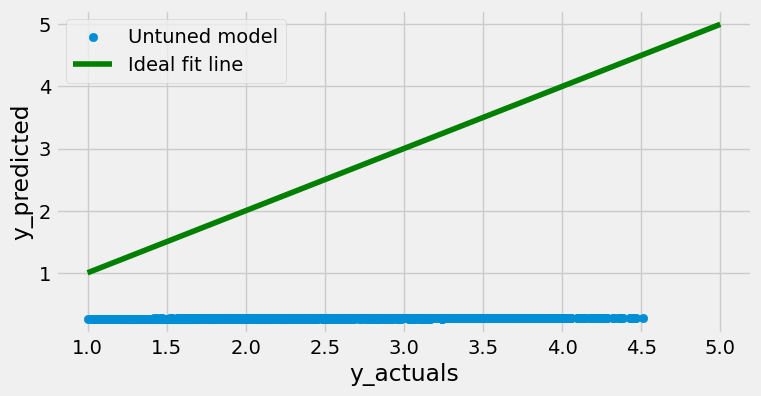

In [144]:
x_a = np.linspace (1,5)
y_a = x_a
fig,ax = plt.subplots(figsize=(8,4))
ax.scatter(y_test1,y_pred_untune,label="Untuned model")
ax.plot(x_a,y_a,label="Ideal fit line",color='green',linewidth=4)
ax.set_xlabel('y_actuals')
ax.set_ylabel('y_predicted')
plt.legend()

### Define loss fn and optimizer

In [129]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params = model.parameters(),lr=0.001)

In [130]:
epochs = 100
for epoch in range(epochs):
  #1. Fwd pass
  y_pred_tr = model(X_train)

  #2. Calculate the loss
  loss_tr = loss_fn(y_pred_tr,y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. bck prop
  loss_tr.backward()

  #5 Optimizer step
  optimizer.step()

  # Put model in evaluation mode
  model.eval()
  with torch.inference_mode():
    y_pred_test = model(X_test)
    loss_test = loss_fn(y_pred_test,y_test)

  if epoch % 10 ==0:
    print(f"epoch: {epoch} | loss_train: {loss_tr} | Loss_test: {loss_test}")

epoch: 0 | loss_train: 0.05945257097482681 | Loss_test: 0.06218736246228218
epoch: 10 | loss_train: 0.05970986932516098 | Loss_test: 0.06109995394945145
epoch: 20 | loss_train: 0.05953708663582802 | Loss_test: 0.061074402183294296
epoch: 30 | loss_train: 0.05942486599087715 | Loss_test: 0.0610618032515049
epoch: 40 | loss_train: 0.0593721903860569 | Loss_test: 0.06105690822005272
epoch: 50 | loss_train: 0.05933871492743492 | Loss_test: 0.06105960160493851
epoch: 60 | loss_train: 0.05930405855178833 | Loss_test: 0.06108107790350914
epoch: 70 | loss_train: 0.05928092822432518 | Loss_test: 0.06106896698474884
epoch: 80 | loss_train: 0.059252891689538956 | Loss_test: 0.0610063262283802
epoch: 90 | loss_train: 0.05922524258494377 | Loss_test: 0.060982514172792435


In [131]:
# Run untrained model
with torch.inference_mode():
  y_pred_tune = model(X_test)

In [132]:
y_pred_tune_np = y_pred_tune.numpy()

In [133]:
y_pred_tr,y_train

(tensor([[2.1575],
         [2.1573],
         [3.4701],
         ...,
         [2.6494],
         [3.5097],
         [2.1687]], grad_fn=<AddmmBackward0>),
 tensor([[2.2479],
         [2.1955],
         [3.4519],
         ...,
         [2.7153],
         [3.5225],
         [2.3280]]))

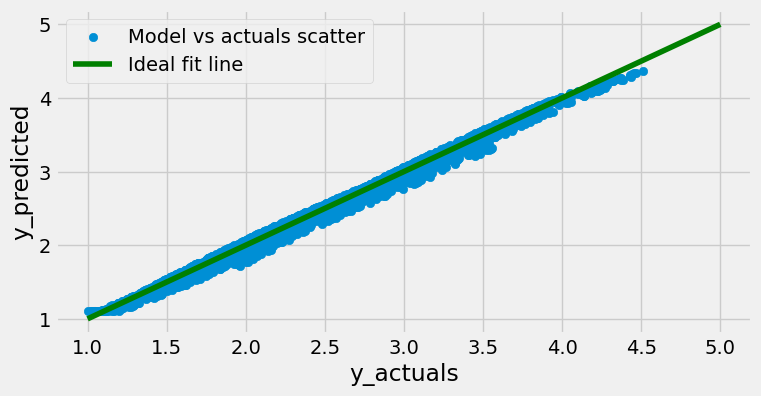

In [141]:
plt.style.use('fivethirtyeight')
x_a = np.linspace (1,5)
y_a = x_a
fig,ax = plt.subplots(figsize=(8,4))
ax.scatter(y_test1,y_pred_tune_np,label="Model vs actuals scatter")
ax.plot(x_a,y_a,label="Ideal fit line",color='green',linewidth=4)
ax.set_xlabel('y_actuals')
ax.set_ylabel('y_predicted')
plt.legend()

In [147]:
# Saving the model
torch.save(model.state_dict(),f='models/model_non_linear.pth')